# Введение в машинное обучение с помощью Python и Scikit-Learn


In [3]:
import numpy as np
import urllib

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.datasets import load_diabetes

In [15]:
import pandas as pd

In [24]:
df=pd.read_csv('diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [174]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df.shape

(768, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
df_train=df.iloc[:,0:7]
y_train=df.iloc[:,8]

In [40]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


# Нормализация данных

In [35]:
from sklearn import preprocessing

In [41]:
df_train_norm=preprocessing.normalize(df_train)

In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
X_scaled=scaler.fit_transform(df_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  0.46849198],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.36506078],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546,  0.60439732],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.68519336],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459, -0.37110101],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.47378505]])

# Отбор признаков

Не секрет, что зачастую самым важным при решении задачи является умение правильно отобрать и даже создать признаки. В англоязычной литературе это называется Feature Selection и Feature Engineering. В то время как Future Engineering довольно творческий процесс и полагается больше на интуицию и экспертные знания, для Feature Selection есть уже большое количество готовых алгоритмов. «Древесные» алгоритмы допускают расчета информативности признаков:

In [55]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.33, random_state=42)

In [57]:
model=ExtraTreesClassifier()

In [58]:
extra_model=ExtraTreesClassifier()

In [59]:
%%time
extra_model.fit(X_train,y_train)

CPU times: user 9.1 ms, sys: 7.07 ms, total: 16.2 ms
Wall time: 15.7 ms


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
extra_model.feature_importances_

array([0.12367209, 0.27894499, 0.12048604, 0.08438866, 0.08382951,
       0.18543404, 0.12324468])

In [61]:
extra_pred=extra_model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [63]:
accuracy_score(extra_pred, y_test)

0.7125984251968503

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [92]:
extra_params={'max_depth' : np.arange(1,20,3), 'max_features' : np.arange(1,7), 'n_estimators' : np.arange(1,30,5) }

In [93]:
%%time
extra_grid=GridSearchCV(extra_model, extra_params, cv=5, n_jobs=-1)

CPU times: user 20 µs, sys: 2 µs, total: 22 µs
Wall time: 24.6 µs


In [94]:
%%time
extra_grid.fit(X_train,y_train)

CPU times: user 1.67 s, sys: 72.3 ms, total: 1.74 s
Wall time: 38.7 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]), 'max_features': array([1, 2, 3, 4, 5, 6]), 'n_estimators': array([ 1,  6, 11, 16, 21, 26])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Все остальные методы так или иначе основаны на эффективном переборе подмножеств признаков с целью найти наилучшее подмножество, на которых построенная модель дает наилучшее качество. Одним из таких алгоритмов перебора является Recursive Feature Elimination алгоритм, который также доступен в библиотеке Scikit-Learn:

In [95]:
extra_grid.best_params_, extra_grid.best_score_

({'max_depth': 10, 'max_features': 6, 'n_estimators': 16}, 0.77431906614786)

In [104]:
grid_pred=extra_grid.best_estimator_.predict(X_test)

In [105]:
accuracy_score(grid_pred, y_test)

0.7322834645669292

Все остальные методы так или иначе основаны на эффективном переборе подмножеств признаков с целью найти наилучшее подмножество, на которых построенная модель дает наилучшее качество. Одним из таких алгоритмов перебора является Recursive Feature Elimination алгоритм, который также доступен в библиотеке Scikit-Learn:


# Логистическая регрессия

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [107]:
log_reg=LogisticRegression()

In [108]:
rfe=RFE(log_reg,3)

In [109]:
rfe_et=rfe.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [110]:
rfe.support_

array([ True,  True, False, False, False,  True, False])

In [111]:
rfe.ranking_

array([1, 1, 4, 5, 2, 1, 3])

In [112]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
log_reg_pred=log_reg.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       168
           1       0.68      0.60      0.64        86

   micro avg       0.77      0.77      0.77       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.77      0.76       254



In [120]:
print(confusion_matrix(y_test,log_reg_pred))

[[143  25]
 [ 34  52]]


In [121]:
accuracy_score(y_test,log_reg_pred)

0.7677165354330708

# Наивный байес

Также является одним из самых известных алгоритмов машинного обучения, основной задачей которого является восстановление плотностей распределения данных обучающей выборки. Зачастую этот метод дает хорошее качество в задачах именно **многоклассовой классификации**. 

In [122]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [123]:
nb=GaussianNB()

In [124]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
nb_pred=nb.predict(X_test)

In [178]:
accuracy_score(y_test,nb_pred)

0.7519685039370079

In [175]:
from sklearn.metrics import roc_auc_score

In [180]:
roc_auc_score(y_test, nb_pred)

0.7188538205980066

# K -neighbors

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn=KNeighborsClassifier()

In [135]:
np.mean(cross_val_score(knn,X_train,y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7275193798449612

In [129]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
knn_pred=knn.predict(X_test)

In [131]:
accuracy_score(knn_pred,y_test)

0.7125984251968503

In [139]:
knn_params={'n_neighbors' : np.arange(1,15,3)}

In [140]:
knn_grid=GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)

In [141]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 108 ms, sys: 32 ms, total: 140 ms
Wall time: 1.31 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  4,  7, 10, 13])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 7}, 0.7509727626459144)

In [143]:
knn_pred=knn_grid.best_estimator_.predict(X_test)

In [144]:
accuracy_score(y_test, knn_pred)

0.7165354330708661

In [181]:
roc_auc_score(y_test, knn_pred)

0.6608527131782945

# Деревья решений

Classification and Regression Trees (CART) часто используются в задачах, в которых обьекты имеют категориальные признаки и используется для задач регресии и классификации. Очень хорошо деревья подходят для многоклассовой классификации


In [145]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
tree=DecisionTreeClassifier()

In [152]:
%%time
rf.fit(X_train, y_train)

CPU times: user 3.12 ms, sys: 401 µs, total: 3.52 ms
Wall time: 3.57 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [153]:
rf_pred=rf.predict(X_test)

In [154]:
accuracy_score(rf_pred, y_test)

0.6811023622047244

# RANDOM FOREST

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [159]:
%%time
rf.fit(X_train,y_train)

CPU times: user 344 ms, sys: 47.3 ms, total: 391 ms
Wall time: 305 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
rf_pred=rf.predict(X_test)

In [161]:
accuracy_score(rf_pred, y_test)

0.7598425196850394

# Метод опорных векторов

SVM (Support Vector Machines) является одним из самых известных алгоритмов машинного обучения, применяемых в основном для задачи классификации. Также как и логистическая регрессия, SVM допускает многоклассовую классификацию методом one-vs-all.

In [162]:
from sklearn.svm import SVC

In [163]:
svc=SVC()

In [164]:
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [166]:
svc_pred=svc.predict(X_test)

In [167]:
accuracy_score(svc_pred,y_test)

0.7598425196850394

# Оптимизация параметров алгоритма

Одним из самых сложных этапов в построении действительно эффективных алгоритмов является выбор правильных параметров. Обычно, это делается легче с опытом, но так или иначе приходится делать перебор. К счастью, в Scikit-Learn уже есть немало реализованных для этого функций

Для примера посмотрим на подбор параметра регуляризации, в котором мы по очереди перебирают несколько значений:

In [170]:
from sklearn.linear_model import Ridge
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.2800307722352019
1.0


In [173]:
grid.best_estimator_.predict(X_test)

array([ 0.2665142 ,  0.29299682,  0.22680081,  0.27761665,  0.46578768,
        0.33531534, -0.18512429,  0.40949462,  0.52804855,  0.5670568 ,
        0.3242869 ,  0.77119986,  0.45580546,  0.28323419,  0.0920785 ,
        0.37102279,  0.17220193,  0.1183461 ,  0.76508583,  0.55361885,
        0.21955883,  0.06905574,  0.47501645,  0.14594498,  0.5549508 ,
        0.8460825 ,  0.20802241, -0.04629805,  0.35134208,  0.11585473,
        0.85274176,  0.6384382 ,  0.76503494,  0.69287996,  0.44294995,
        0.68434245,  0.79590906,  0.22540804,  0.41938165,  0.5960371 ,
        0.06785115,  0.36072466,  0.37189363,  0.43996567,  0.00970472,
        0.54945466,  0.40104845,  0.29534762,  0.29987501,  0.83869035,
        0.06442554,  0.56154183,  0.68695693,  0.38255865,  0.20785328,
       -0.0057412 ,  0.58188152, -0.34878661,  0.44809855,  0.69371995,
        0.64203325,  0.39571252,  0.21576783,  0.28956388,  0.09924341,
        0.57466154,  0.00564482,  0.71261604, -0.01257541,  0.70

# Нейронная сеть

In [182]:
from keras.models import Sequential
from keras.layers import Dense

In [183]:
np.random.seed(2)

Создаем модель нейронной сети:

In [247]:
model=Sequential()

Опишем структуру модели нейронной сети. Определим входной, выходной и скрытые слои. Наша нейронная сеть будет иметь плотную (Dense) структуру – каждый нейрон связан со всеми нейронами следующего слоя. Выходной слой будет состоять из единственного нейрона, определяющего вероятность заболевания диабетом.

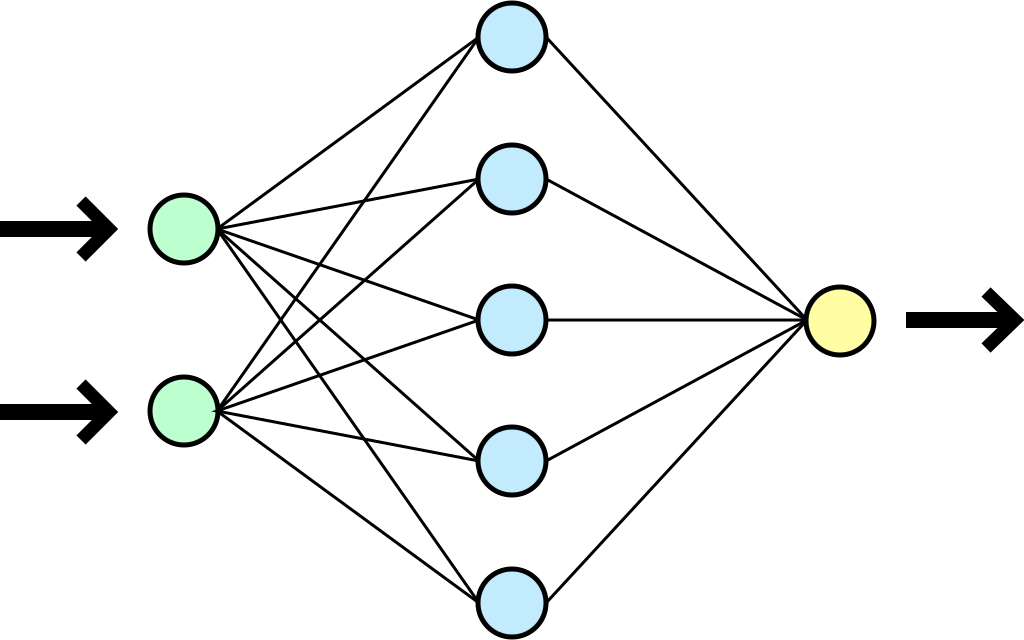


Слой добавляется к модели методом add(). **Для входного слоя необходимо указать число признаков input_dim, равное в нашем случае 8**:

In [248]:
model.add(Dense(12, input_dim=7, activation='relu'))

Если наборы признаков образуют многомерную таблицу, то вместо параметра input_dim можно использовать параметр input_shape, принимающий кортеж с количеством элементов в каждом из измерений.

В качестве функции активации для всех слоев, кроме выходного, будем использовать функцию ReLU. Для выходного слоя воспользуемся сигмоидной функцией для определения конечной вероятности риска заболевания.

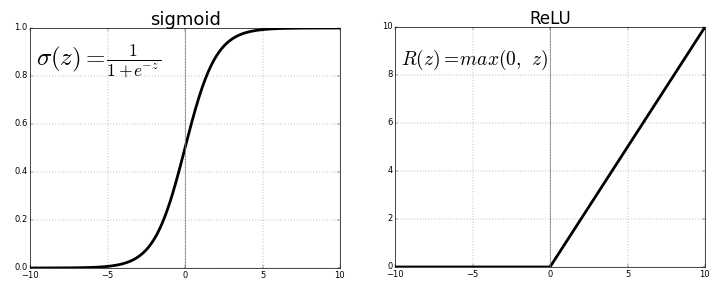

Создадим три скрытых слоя и один выходной слой нашей нейронной сети:

In [249]:
model.add(Dense(15, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Первые числа, передаваемые Dense, это количества нейронов, экспериментально оптимизированные в результате вариации структуры нейронной сети. Вы можете изменять количество скрытых слоев и содержащихся в них нейронов, чтобы добиться лучшего качества предсказательности модели.

Перед тем, как начать тренировать модель, ее нужно скомпилировать при помощи метода compile():

In [250]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
            
# loss - функция потерь, accuracy - точность

Методу передается три параметра:

    loss – функция потерь – объект, который модель стремиться минимизировать;
    optimizer – оптимизатор, мы используем встроенный метод стохастической оптимизации adam, описанный в публикации Дедерика Кингма и Джимми Ба;
    metrics – список метрик оптимизации, для задач классификации используется метрику ‘accuracy’.


### Нейронная сеть: обучение и оценка результата

Для обучения нейронной сети применяем метод fit():

Параметр **epochs – «эпохи»** – количество проходов нейронной сети по всем записям датасета (выбирается исходя из того, насколько быстро модель с каждым новым проходом приближается к желаемой предсказательной точности), 

**batch_size** – количество объектов выборки, берущихся за один шаг. 

В процессе обучения API будет выводить соответствующие строчки с величинам функции потерь и метрики для каждой из эпох.

In [251]:
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
514/514 [==============================] - 0s 881us/step - loss: 0.6733 - acc: 0.6265
Epoch 2/1000
514/514 [==============================] - 0s 125us/step - loss: 0.6317 - acc: 0.7101
Epoch 3/1000
514/514 [==============================] - 0s 129us/step - loss: 0.5843 - acc: 0.7315
Epoch 4/1000
514/514 [==============================] - 0s 125us/step - loss: 0.5277 - acc: 0.7510
Epoch 5/1000
514/514 [==============================] - 0s 134us/step - loss: 0.4893 - acc: 0.7665
Epoch 6/1000
514/514 [==============================] - 0s 119us/step - loss: 0.4700 - acc: 0.7685
Epoch 7/1000
514/514 [==============================] - 0s 158us/step - loss: 0.4568 - acc: 0.7665
Epoch 8/1000
514/514 [==============================] - 0s 133us/step - loss: 0.4517 - acc: 0.7724
Epoch 9/1000
514/514 [==============================] - 0s 130us/step - loss: 0.4455 - acc: 0.7763
Epoch 10/1000
514/514 [==============================] - 0s 122us/step - loss: 0.4433 - acc: 0.7763
Epoch 11/

514/514 [==============================] - 0s 163us/step - loss: 0.3113 - acc: 0.8638
Epoch 84/1000
514/514 [==============================] - 0s 172us/step - loss: 0.3105 - acc: 0.8541
Epoch 85/1000
514/514 [==============================] - 0s 149us/step - loss: 0.3095 - acc: 0.8521
Epoch 86/1000
514/514 [==============================] - 0s 138us/step - loss: 0.3079 - acc: 0.8696
Epoch 87/1000
514/514 [==============================] - 0s 111us/step - loss: 0.3040 - acc: 0.8580
Epoch 88/1000
514/514 [==============================] - 0s 119us/step - loss: 0.3004 - acc: 0.8677
Epoch 89/1000
514/514 [==============================] - 0s 111us/step - loss: 0.3009 - acc: 0.8677
Epoch 90/1000
514/514 [==============================] - 0s 109us/step - loss: 0.2996 - acc: 0.8599
Epoch 91/1000
514/514 [==============================] - 0s 126us/step - loss: 0.2958 - acc: 0.8658
Epoch 92/1000
514/514 [==============================] - 0s 118us/step - loss: 0.2974 - acc: 0.8696
Epoch 93/1000


514/514 [==============================] - 0s 109us/step - loss: 0.2112 - acc: 0.9086
Epoch 165/1000
514/514 [==============================] - 0s 101us/step - loss: 0.2111 - acc: 0.9027
Epoch 166/1000
514/514 [==============================] - 0s 101us/step - loss: 0.2089 - acc: 0.9125
Epoch 167/1000
514/514 [==============================] - 0s 109us/step - loss: 0.2109 - acc: 0.9008
Epoch 168/1000
514/514 [==============================] - 0s 106us/step - loss: 0.2076 - acc: 0.9163
Epoch 169/1000
514/514 [==============================] - 0s 102us/step - loss: 0.2056 - acc: 0.9144
Epoch 170/1000
514/514 [==============================] - 0s 98us/step - loss: 0.2134 - acc: 0.9066
Epoch 171/1000
514/514 [==============================] - 0s 97us/step - loss: 0.2114 - acc: 0.8988
Epoch 172/1000
514/514 [==============================] - 0s 107us/step - loss: 0.2014 - acc: 0.9222
Epoch 173/1000
514/514 [==============================] - 0s 102us/step - loss: 0.2055 - acc: 0.9105
Epoch 1

514/514 [==============================] - 0s 120us/step - loss: 0.1345 - acc: 0.9397
Epoch 246/1000
514/514 [==============================] - 0s 109us/step - loss: 0.1397 - acc: 0.9533
Epoch 247/1000
514/514 [==============================] - 0s 111us/step - loss: 0.1343 - acc: 0.9494
Epoch 248/1000
514/514 [==============================] - 0s 97us/step - loss: 0.1335 - acc: 0.9572
Epoch 249/1000
514/514 [==============================] - 0s 102us/step - loss: 0.1283 - acc: 0.9533
Epoch 250/1000
514/514 [==============================] - 0s 107us/step - loss: 0.1345 - acc: 0.9475
Epoch 251/1000
514/514 [==============================] - 0s 112us/step - loss: 0.1328 - acc: 0.9436
Epoch 252/1000
514/514 [==============================] - 0s 98us/step - loss: 0.1291 - acc: 0.9514
Epoch 253/1000
514/514 [==============================] - 0s 100us/step - loss: 0.1280 - acc: 0.9475
Epoch 254/1000
514/514 [==============================] - 0s 129us/step - loss: 0.1285 - acc: 0.9436
Epoch 2

514/514 [==============================] - 0s 106us/step - loss: 0.0838 - acc: 0.9708
Epoch 327/1000
514/514 [==============================] - 0s 112us/step - loss: 0.0876 - acc: 0.9669
Epoch 328/1000
514/514 [==============================] - 0s 108us/step - loss: 0.0848 - acc: 0.9650
Epoch 329/1000
514/514 [==============================] - 0s 100us/step - loss: 0.1008 - acc: 0.9669
Epoch 330/1000
514/514 [==============================] - 0s 97us/step - loss: 0.0939 - acc: 0.9611
Epoch 331/1000
514/514 [==============================] - 0s 108us/step - loss: 0.0877 - acc: 0.9591
Epoch 332/1000
514/514 [==============================] - 0s 113us/step - loss: 0.0858 - acc: 0.9689
Epoch 333/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0802 - acc: 0.9669
Epoch 334/1000
514/514 [==============================] - 0s 103us/step - loss: 0.0807 - acc: 0.9708
Epoch 335/1000
514/514 [==============================] - 0s 108us/step - loss: 0.0818 - acc: 0.9728
Epoch 

514/514 [==============================] - 0s 99us/step - loss: 0.0556 - acc: 0.9844
Epoch 408/1000
514/514 [==============================] - 0s 161us/step - loss: 0.0525 - acc: 0.9825
Epoch 409/1000
514/514 [==============================] - 0s 95us/step - loss: 0.0521 - acc: 0.9825
Epoch 410/1000
514/514 [==============================] - 0s 110us/step - loss: 0.0518 - acc: 0.9864
Epoch 411/1000
514/514 [==============================] - 0s 119us/step - loss: 0.0539 - acc: 0.9844
Epoch 412/1000
514/514 [==============================] - 0s 94us/step - loss: 0.0570 - acc: 0.9825
Epoch 413/1000
514/514 [==============================] - 0s 127us/step - loss: 0.0597 - acc: 0.9767
Epoch 414/1000
514/514 [==============================] - 0s 141us/step - loss: 0.0564 - acc: 0.9825
Epoch 415/1000
514/514 [==============================] - 0s 126us/step - loss: 0.0542 - acc: 0.9864
Epoch 416/1000
514/514 [==============================] - 0s 113us/step - loss: 0.0566 - acc: 0.9805
Epoch 41

514/514 [==============================] - 0s 99us/step - loss: 0.0378 - acc: 0.9883
Epoch 489/1000
514/514 [==============================] - 0s 102us/step - loss: 0.0480 - acc: 0.9767
Epoch 490/1000
514/514 [==============================] - 0s 103us/step - loss: 0.0459 - acc: 0.9883
Epoch 491/1000
514/514 [==============================] - 0s 97us/step - loss: 0.1315 - acc: 0.9669
Epoch 492/1000
514/514 [==============================] - 0s 116us/step - loss: 0.0921 - acc: 0.9611
Epoch 493/1000
514/514 [==============================] - 0s 104us/step - loss: 0.0676 - acc: 0.9669
Epoch 494/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0426 - acc: 0.9825
Epoch 495/1000
514/514 [==============================] - 0s 109us/step - loss: 0.0407 - acc: 0.9844
Epoch 496/1000
514/514 [==============================] - 0s 102us/step - loss: 0.0446 - acc: 0.9767
Epoch 497/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0343 - acc: 0.9864
Epoch 49

514/514 [==============================] - 0s 98us/step - loss: 0.0254 - acc: 0.9922
Epoch 570/1000
514/514 [==============================] - 0s 105us/step - loss: 0.0337 - acc: 0.9883
Epoch 571/1000
514/514 [==============================] - 0s 117us/step - loss: 0.0297 - acc: 0.9903
Epoch 572/1000
514/514 [==============================] - 0s 105us/step - loss: 0.0293 - acc: 0.9922
Epoch 573/1000
514/514 [==============================] - 0s 97us/step - loss: 0.0432 - acc: 0.9805
Epoch 574/1000
514/514 [==============================] - 0s 101us/step - loss: 0.0339 - acc: 0.9903
Epoch 575/1000
514/514 [==============================] - 0s 104us/step - loss: 0.0264 - acc: 0.9922
Epoch 576/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0255 - acc: 0.9942
Epoch 577/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0281 - acc: 0.9903
Epoch 578/1000
514/514 [==============================] - 0s 102us/step - loss: 0.0304 - acc: 0.9883
Epoch 57

514/514 [==============================] - 0s 101us/step - loss: 0.0234 - acc: 0.9942
Epoch 651/1000
514/514 [==============================] - 0s 106us/step - loss: 0.0263 - acc: 0.9942
Epoch 652/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0238 - acc: 0.9961
Epoch 653/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0289 - acc: 0.9903
Epoch 654/1000
514/514 [==============================] - 0s 99us/step - loss: 0.0231 - acc: 0.9942
Epoch 655/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0223 - acc: 0.9942
Epoch 656/1000
514/514 [==============================] - 0s 109us/step - loss: 0.0215 - acc: 0.9922
Epoch 657/1000
514/514 [==============================] - 0s 99us/step - loss: 0.0198 - acc: 0.9942
Epoch 658/1000
514/514 [==============================] - 0s 112us/step - loss: 0.0207 - acc: 0.9961
Epoch 659/1000
514/514 [==============================] - 0s 113us/step - loss: 0.0236 - acc: 0.9922
Epoch 66

514/514 [==============================] - 0s 112us/step - loss: 0.0187 - acc: 0.9942
Epoch 732/1000
514/514 [==============================] - 0s 107us/step - loss: 0.0209 - acc: 0.9942
Epoch 733/1000
514/514 [==============================] - 0s 105us/step - loss: 0.0215 - acc: 0.9942
Epoch 734/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0247 - acc: 0.9883
Epoch 735/1000
514/514 [==============================] - 0s 107us/step - loss: 0.0233 - acc: 0.9903
Epoch 736/1000
514/514 [==============================] - 0s 109us/step - loss: 0.0175 - acc: 0.9961
Epoch 737/1000
514/514 [==============================] - 0s 109us/step - loss: 0.0177 - acc: 0.9942
Epoch 738/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0178 - acc: 0.9961
Epoch 739/1000
514/514 [==============================] - 0s 108us/step - loss: 0.0157 - acc: 0.9981
Epoch 740/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0172 - acc: 0.9961
Epoch 

514/514 [==============================] - 0s 110us/step - loss: 0.0173 - acc: 0.9961
Epoch 813/1000
514/514 [==============================] - 0s 105us/step - loss: 0.0145 - acc: 0.9961
Epoch 814/1000
514/514 [==============================] - 0s 101us/step - loss: 0.0158 - acc: 0.9942
Epoch 815/1000
514/514 [==============================] - 0s 103us/step - loss: 0.0142 - acc: 0.9981
Epoch 816/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0184 - acc: 0.9942
Epoch 817/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0155 - acc: 0.9961
Epoch 818/1000
514/514 [==============================] - 0s 106us/step - loss: 0.0190 - acc: 0.9922
Epoch 819/1000
514/514 [==============================] - 0s 111us/step - loss: 0.0222 - acc: 0.9922
Epoch 820/1000
514/514 [==============================] - 0s 106us/step - loss: 0.0198 - acc: 0.9942
Epoch 821/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0164 - acc: 0.9922
Epoch 

514/514 [==============================] - 0s 107us/step - loss: 0.0146 - acc: 0.9981
Epoch 894/1000
514/514 [==============================] - 0s 113us/step - loss: 0.0161 - acc: 0.9922
Epoch 895/1000
514/514 [==============================] - 0s 101us/step - loss: 0.0137 - acc: 0.9961
Epoch 896/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0157 - acc: 0.9942
Epoch 897/1000
514/514 [==============================] - 0s 108us/step - loss: 0.0141 - acc: 0.9981
Epoch 898/1000
514/514 [==============================] - 0s 104us/step - loss: 0.0166 - acc: 0.9903
Epoch 899/1000
514/514 [==============================] - 0s 101us/step - loss: 0.0141 - acc: 0.9961
Epoch 900/1000
514/514 [==============================] - 0s 103us/step - loss: 0.0160 - acc: 0.9961
Epoch 901/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0137 - acc: 0.9942
Epoch 902/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0192 - acc: 0.9942
Epoch 

514/514 [==============================] - 0s 101us/step - loss: 0.0447 - acc: 0.9942
Epoch 975/1000
514/514 [==============================] - 0s 103us/step - loss: 0.0443 - acc: 0.9922
Epoch 976/1000
514/514 [==============================] - 0s 104us/step - loss: 0.0503 - acc: 0.9903
Epoch 977/1000
514/514 [==============================] - 0s 100us/step - loss: 0.0466 - acc: 0.9903
Epoch 978/1000
514/514 [==============================] - 0s 98us/step - loss: 0.0444 - acc: 0.9922
Epoch 979/1000
514/514 [==============================] - 0s 101us/step - loss: 0.0465 - acc: 0.9961
Epoch 980/1000
514/514 [==============================] - 0s 99us/step - loss: 0.0460 - acc: 0.9922
Epoch 981/1000
514/514 [==============================] - 0s 105us/step - loss: 0.0454 - acc: 0.9942
Epoch 982/1000
514/514 [==============================] - 0s 97us/step - loss: 0.0542 - acc: 0.9883
Epoch 983/1000
514/514 [==============================] - 0s 111us/step - loss: 0.0442 - acc: 0.9922
Epoch 98

Оценим результат обучения нейронной сети. Метод evaluate() возвращает значения функции потерь и метрики для обученной модели:

In [252]:
scores=model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

514/514 [==============================] - 0s 252us/step

acc: 99.81%


In [253]:
model_pred=model.predict_classes(X_test,batch_size=10,)

In [254]:
roc_auc_score(y_test, model_pred)

0.6247231450719823

#  Tensorflow

In [233]:
X_train.shape, y_train.shape, X_test_shape, y_test.shape

NameError: name 'X_test_shape' is not defined